![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/49487713.jpg)
• 图形分析

• 相关分析

• 方差分析

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/58512695.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy import stats

In [2]:
tips=pd.read_csv('tips.csv')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


---
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-27/31228716.jpg)

### 画图

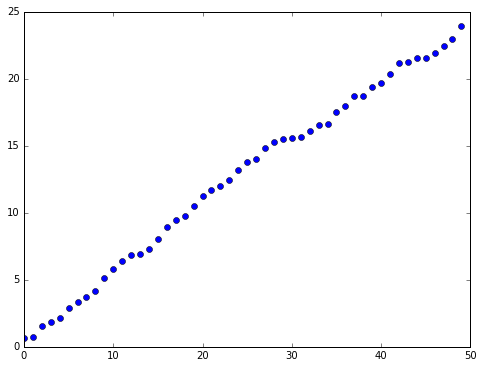

In [5]:
%matplotlib inline
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
from numpy import random
ax.plot(random.rand(50).cumsum(),'o')

#### 性别和小费是否有关 
有图可知  没有太多关系

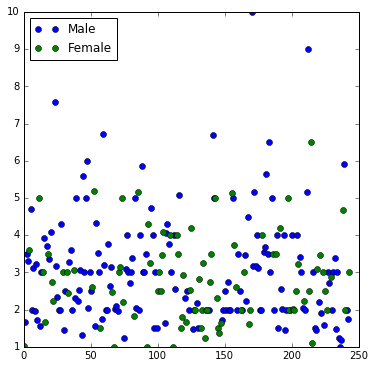

In [7]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(tips[tips['sex']=='Male']['tip'],'o',label='Male')
ax.plot(tips[tips['sex']=='Female']['tip'],'o',label='Female')
ax.legend(loc='best')

In [8]:
ax.clear()

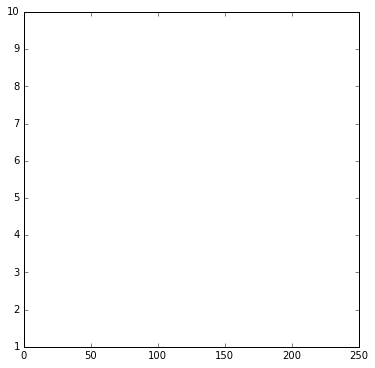

In [9]:
fig

 总的花费与小费 之间

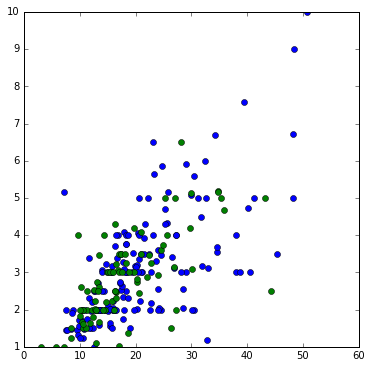

In [11]:
ax.plot(tips[tips['sex']=='Male']['total_bill'],tips[tips['sex']=='Male']['tip'],'o',label='Male')
ax.plot(tips[tips['sex']=='Female']['total_bill'],tips[tips['sex']=='Female']['tip'],'o',label='Female')
fig

In [14]:
ax.clear()

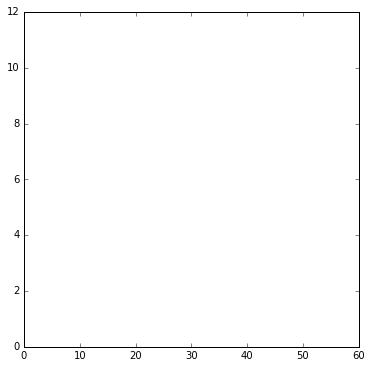

In [15]:
fig

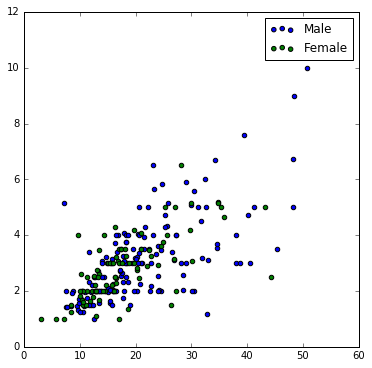

In [16]:
ax.scatter(tips[tips['sex']=='Male']['total_bill'],tips[tips['sex']=='Male']['tip'],label='Male')
ax.scatter(tips[tips['sex']=='Female']['total_bill'],tips[tips['sex']=='Female']['tip'],c='g',label='Female')
ax.legend(loc='best')
fig

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7e46febd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd7e3eb7190>], dtype=object)

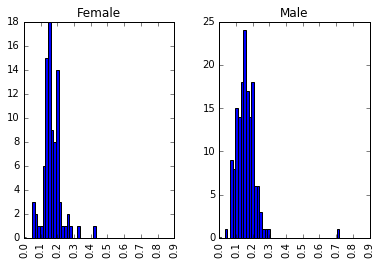

In [17]:
tips['tip_pct']=tips['tip']/tips['total_bill']
tips['tip_pct'].hist(by=tips['sex'],bins=50,range=[0,0.8])

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/16178684.jpg)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd7e3981d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7e398fcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7e399afd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7e399a990>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd7e3981f90>,
  <matplotlib.lines.Line2D at 0x7fd7e39332d0>]}

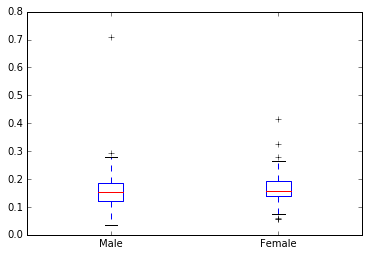

In [20]:
rvs1=tips[tips['sex']=='Male']['tip_pct']
rvs2=tips[tips['sex']=='Female']['tip_pct']
plt.boxplot([rvs1,rvs2],labels=['Male','Female'])

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/83926227.jpg)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/62764218.jpg)

### 类别型 --类别型

In [27]:
## 列联表
##星期几是否与性别有关
count=pd.crosstab(tips.sex, tips.day)
count

day,Fri,Sat,Sun,Thur
sex,,,,
Female,9,28,18,32
Male,10,59,58,30


In [22]:
count.T

sex,Female,Male
day,,
Fri,9,10
Sat,28,59
Sun,18,58
Thur,32,30


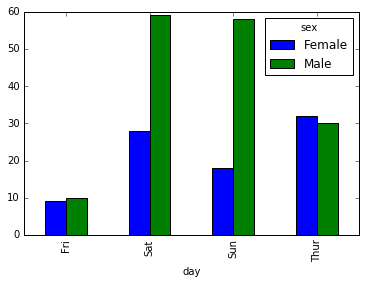

In [28]:
count.T.plot(kind='bar')

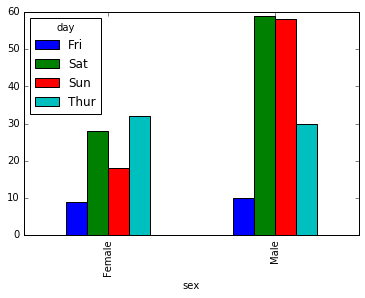

In [29]:
count.plot(kind='bar')

In [25]:
##星期几与吸烟是否有关
count1=pd.crosstab(tips.smoker, tips.day)
count1

day,Fri,Sat,Sun,Thur
smoker,,,,
No,4,45,57,45
Yes,15,42,19,17


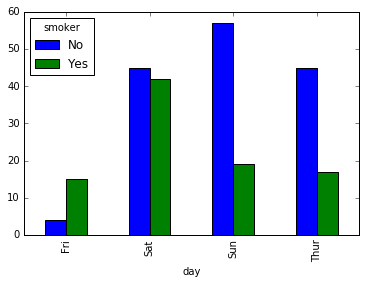

In [26]:
count1.T.plot(kind='bar')

In [34]:
##卡方检验
stats.chi2_contingency(count,correction=False)

(13.222001372406609,
 0.0041803020928222571,
 3,
 array([[  6.77459016,  31.0204918 ,  27.09836066,  22.10655738],
        [ 12.22540984,  55.9795082 ,  48.90163934,  39.89344262]]))

In [31]:
 #自由度dof
chi2, p, dof, ex = stats.chi2_contingency(count,correction=False)

In [32]:
p ##p值很小 所以两者之间没有关系

0.0041803020928222571

### 为什么是卡方检验
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/62479537.jpg)

In [35]:
ex  ##卡方理论分布值

array([[  6.77459016,  31.0204918 ,  27.09836066,  22.10655738],
       [ 12.22540984,  55.9795082 ,  48.90163934,  39.89344262]])

In [36]:
count #实际值

day,Fri,Sat,Sun,Thur
sex,,,,
Female,9,28,18,32
Male,10,59,58,30


![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/28989868.jpg)

In [37]:

count= pd.crosstab(tips.sex,tips.smoker)

In [38]:
# oddsratio 2*2检验 
count

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [39]:
oddsratio, pvalue = stats.fisher_exact(count)

In [40]:
## 原假设 两者之间没有关系 
oddsratio, pvalue

(1.0121836925960637, 1.0)

In [41]:
count.iat[0,0]=2
stats.fisher_exact(count)

(0.037488284910965321, 3.9900059898475714e-10)

In [42]:
count.iat[0,0]=30
stats.fisher_exact(count)

(0.5623242736644799, 0.069812038031474608)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/74859176.jpg)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/15050100.jpg)

In [43]:
stats.pearsonr(tips.total_bill,tips.tip)

(0.67573410921136434, 6.6924706468640407e-34)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/77622162.jpg)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/22939269.jpg)
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/15717422.jpg)

In [44]:
np.random.seed(1234321)
x = np.random.randn(100)
y = np.random.randn(100)
rho, pval = stats.spearmanr(x, y)

In [45]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.061326132613261322, pvalue=0.54443372627355135)

In [47]:
y2n = np.random.randn(100,2)
x2n = np.random.randn(100,2)
rho, pval = stats.spearmanr(x2n, y2n)
rho, pval = stats.spearmanr(x2n.T, y2n.T, axis=1)

In [48]:
rho

array([[  1.00000000e+00,   1.12547255e-01,   1.17143714e-01,
          1.78697870e-02],
       [  1.12547255e-01,   1.00000000e+00,   1.76453645e-01,
          2.88028803e-04],
       [  1.17143714e-01,   1.76453645e-01,   1.00000000e+00,
          3.48874887e-02],
       [  1.78697870e-02,   2.88028803e-04,   3.48874887e-02,
          1.00000000e+00]])

In [49]:
pval

array([[ 0.        ,  0.26490655,  0.24575962,  0.85992843],
       [ 0.26490655,  0.        ,  0.07906117,  0.99773076],
       [ 0.24575962,  0.07906117,  0.        ,  0.73039992],
       [ 0.85992843,  0.99773076,  0.73039992,  0.        ]])

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/25584094.jpg)

---
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/66911418.jpg)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/21760895.jpg)

In [50]:
rvs1=tips[tips['sex']=='Male']['tip']
rvs2=tips[tips['sex']=='Female']['tip']
stats.ttest_ind(rvs1, rvs2)
## 可知 性别与给小费的多少 没有关系 

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

---
---
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/69282591.jpg)
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/12142813.jpg)

In [ ]:
## 请用方差分析星期几对小费的比例是否有影响?


In [63]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [66]:
sun = tips[tips['day']=='Sun']['tip_pct']
sat = tips[tips['day']=='Sat']['tip_pct']
fri = tips[tips['day']=='Fri']['tip_pct']
thr = tips[tips['day']=='Thur']['tip_pct']

In [67]:
stats.f_oneway(sun,sat,fri,thr)

F_onewayResult(statistic=0.84800487891301235, pvalue=0.46884089923526473)

In [68]:
## 客人的数量与 小费 是有关的 
stats.spearmanr(tips['size'],tips['tip_pct'])

SpearmanrResult(correlation=-0.15216439029586909, pvalue=0.017381095227391195)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/10862534.jpg)
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/77468273.jpg)